In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls "/content/gdrive/My Drive/Colab Notebooks/crop diseases/zindi_data/"


Sample_Submission_kaggle.csv  test.csv	train.csv


In [ ]:
pip install catboost

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor

In [ ]:
train=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/crop diseases/zindi_data/train.csv")
test=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/crop diseases/zindi_data/test.csv")
sub=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/crop diseases/zindi_data/Sample_Submission_kaggle.csv")


In [ ]:
col_train=[]
for col in train.columns:
    if train[col].notnull().sum()>170000:
        col_train.append(col)
train_2=train[col_train+['designation']+['title']+['region_1','region_2','taster_name','taster_twitter_handle']]        
train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                174953 non-null  object 
 1   description            175000 non-null  object 
 2   points                 175000 non-null  float64
 3   price                  175000 non-null  float64
 4   province               174953 non-null  object 
 5   variety                174999 non-null  object 
 6   winery                 175000 non-null  object 
 7   id                     175000 non-null  int64  
 8   designation            122734 non-null  object 
 9   title                  82189 non-null   object 
 10  region_1               146466 non-null  object 
 11  region_2               75394 non-null   object 
 12  taster_name            65509 non-null   object 
 13  taster_twitter_handle  62190 non-null   object 
dtypes: float64(2), int64(1), object(11)


In [ ]:
test_2=test[col_train+['designation']+['title']+['region_1','region_2','taster_name','taster_twitter_handle']]
test_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83210 entries, 0 to 83209
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                83193 non-null  object 
 1   description            83210 non-null  object 
 2   points                 83210 non-null  float64
 3   price                  0 non-null      float64
 4   province               83193 non-null  object 
 5   variety                83210 non-null  object 
 6   winery                 83210 non-null  object 
 7   id                     83210 non-null  int64  
 8   designation            58386 non-null  object 
 9   title                  38786 non-null  object 
 10  region_1               69327 non-null  object 
 11  region_2               35602 non-null  object 
 12  taster_name            30970 non-null  object 
 13  taster_twitter_handle  29369 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 8.9+

In [ ]:
train_2['description']=train_2['description'].str.replace('[^a-zA-Z]',' ')
test_2['description']=test_2['description'].str.replace('[^a-zA-Z]',' ')
train_2['description']=train_2['description'].str.lower()
test_2['description']=test_2['description'].str.lower()
print(train_2['description'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0         this is a fine rich balanced wine  it has ripe...
1         a solid  chunky wine  with a structure that is...
2         this is powerful and concentrated  with the hi...
3         rich  ripe and oaky  this petite sirah charms ...
4         this wine is a unique in the state blend and f...
                                ...                        
174995    named for the clone so beloved by winemakers  ...
174996    this is a fresh  fruity and juicy wine  shot t...
174997    clean and toasty  with mineral and the slighte...
174998    a lovely pinot noir  showing flamboyantly ripe...
174999    made to benefit the exploratory organization  ...
Name: description, Length: 175000, dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
###basic feature
# Find the length of each text
train_2['char_cnt'] = train_2['description'].str.len()

# Count the number of words in each text
train_2['word_cnt'] = train_2['description'].str.split().str.len()

# Find the average length of word
train_2['avg_word_length_description'] = train_2['char_cnt']/ train_2['word_cnt'] 

# Print the first 5 rows of these columns
print(train_2[['description', 'char_cnt', 'word_cnt', 'avg_word_length_description']])

                                              description  ...  avg_word_length_description
0       this is a fine rich balanced wine  it has ripe...  ...                     5.680851
1       a solid  chunky wine  with a structure that is...  ...                     5.487805
2       this is powerful and concentrated  with the hi...  ...                     6.218750
3       rich  ripe and oaky  this petite sirah charms ...  ...                     6.032258
4       this wine is a unique in the state blend and f...  ...                     5.686275
...                                                   ...  ...                          ...
174995  named for the clone so beloved by winemakers  ...  ...                     5.936170
174996  this is a fresh  fruity and juicy wine  shot t...  ...                     5.323529
174997  clean and toasty  with mineral and the slighte...  ...                     5.857143
174998  a lovely pinot noir  showing flamboyantly ripe...  ...                  

In [ ]:
###basic feature
# Find the length of each text
test_2['char_cnt'] = test_2['description'].str.len()

# Count the number of words in each text
test_2['word_cnt'] = test_2['description'].str.split().str.len()

# Find the average length of word
test_2['avg_word_length_description'] = test_2['char_cnt']/ test_2['word_cnt'] 

# Print the first 5 rows of these columns
print(test_2[['description', 'char_cnt', 'word_cnt', 'avg_word_length_description']])

                                             description  ...  avg_word_length_description
0      sweet new oak stands out  giving this cabernet...  ...                     5.896552
1      charming raspberry aromas intertwine with scen...  ...                     5.973684
2      ripe blackberry  leather and soy show on the n...  ...                     5.357143
3      white flowers and wild anise give this a crisp...  ...                     6.125000
4      pinot gris has been making inroads in washingt...  ...                     5.583333
...                                                  ...  ...                          ...
83205  a simple  direct wine  pretty full bodied for ...  ...                     6.263158
83206  this dry  spicy wine shows the rustic  rugged ...  ...                     6.171429
83207  attractive apricot  peach and honey aromas vie...  ...                     6.163265
83208  red cherries and jelly fruits highlight a wine...  ...                     5.652174

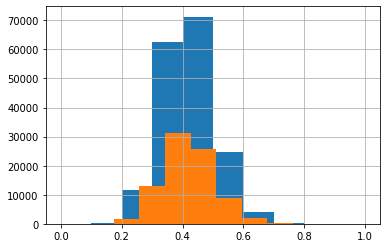

In [ ]:
#it's a normal distribution so just aplly minmaxscaller
from sklearn.preprocessing import MinMaxScaler
MM_scaler=MinMaxScaler()
MM_scaler.fit(train_2[['avg_word_length_description']])
train_2['avg_word_length_description_scaled']=MM_scaler.transform(train_2[['avg_word_length_description']])
test_2['avg_word_length_description_scaled']=MM_scaler.transform(test_2[['avg_word_length_description']])
train_2['avg_word_length_description_scaled'].hist()
test_2['avg_word_length_description_scaled'].hist()
plt.show()
train_2['avg_word_length_description']=train_2['avg_word_length_description_scaled']
test_2['avg_word_length_description']=test_2['avg_word_length_description_scaled']
train_2.drop(['avg_word_length_description_scaled'],axis=1,inplace=True)
test_2.drop(['avg_word_length_description_scaled'],axis=1,inplace=True)

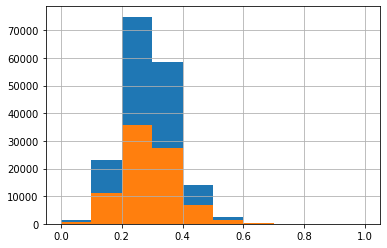

In [ ]:
#it's a normal distribution so just aplly minmaxscaller
from sklearn.preprocessing import MinMaxScaler
MM_scaler=MinMaxScaler()
MM_scaler.fit(train_2[['word_cnt']])
train_2['word_cnt_scaled']=MM_scaler.transform(train_2[['word_cnt']])
test_2['word_cnt_scaled']=MM_scaler.transform(test_2[['word_cnt']])
train_2['word_cnt_scaled'].hist()
test_2['word_cnt_scaled'].hist()
plt.show()
train_2['word_cnt']=train_2['word_cnt_scaled']
test_2['word_cnt']=test_2['word_cnt_scaled']
train_2.drop(['word_cnt_scaled'],axis=1,inplace=True)
test_2.drop(['word_cnt_scaled'],axis=1,inplace=True)

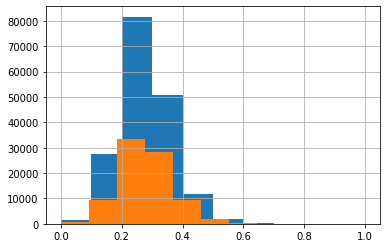

In [ ]:
#it's a normal distribution so just aplly minmaxscaller
from sklearn.preprocessing import MinMaxScaler
MM_scaler=MinMaxScaler()
MM_scaler.fit(train_2[['char_cnt']])
train_2['char_cnt_scaled']=MM_scaler.transform(train_2[['char_cnt']])
test_2['char_cnt_scaled']=MM_scaler.transform(test_2[['char_cnt']])
train_2['char_cnt_scaled'].hist()
test_2['char_cnt_scaled'].hist()
plt.show()
train_2['char_cnt']=train_2['char_cnt_scaled']
test_2['char_cnt']=test_2['char_cnt_scaled']
train_2.drop(['char_cnt_scaled'],axis=1,inplace=True)
test_2.drop(['char_cnt_scaled'],axis=1,inplace=True)

In [ ]:
train_2['designation']=train_2['designation'].str.replace('[^a-zA-Z]',' ')
test_2['designation']=test_2['designation'].str.replace('[^a-zA-Z]',' ')
train_2['designation']=train_2['designation'].str.lower()
test_2['designation']=test_2['designation'].str.lower()
print(train_2['designation'])

0                                        vila santa reserva
1                                                       NaN
2                                                       NaN
3                                         thompson vineyard
4                                 mckinley springs vineyard
                                ...                        
174995                                            old wente
174996                                       bojador branco
174997                                    cordon negro brut
174998                                         estate grown
174999    national geographic ocean reserve blanc de blancs
Name: designation, Length: 175000, dtype: object


In [ ]:
train_2['title']=train_2['title'].str.replace('[^a-zA-Z]',' ')
test_2['title']=test_2['title'].str.replace('[^a-zA-Z]',' ')
train_2['title']=train_2['title'].str.lower()
test_2['title']=test_2['title'].str.lower()
print(train_2['title'])

0                                                       NaN
1                                                       NaN
2                                                       NaN
3         jaffurs      thompson vineyard petite sirah  s...
4         syncline      mckinley springs vineyard ros   ...
                                ...                        
174995    lynmar      old wente chardonnay  russian rive...
174996    espa o rural      bojador branco white  alente...
174997                                                  NaN
174998                                                  NaN
174999    iron horse      national geographic ocean rese...
Name: title, Length: 175000, dtype: object


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tv=TfidfVectorizer(max_features=1000,stop_words='english')
tv.fit(train_2['description'])
#getting the features
feature_names=tv.get_feature_names()
print(feature_names)
cv_transformed_train=tv.transform(train_2['description'])
cv_df_train=pd.DataFrame(cv_transformed_train.toarray(),columns=tv.get_feature_names()).add_prefix('TFIDF_')
print(cv_df_train.head())
examine_row=cv_df_train.iloc[0]
print(examine_row.sort_values(ascending=False))
train_2=pd.concat([train_2,cv_df_train],axis=1,sort=False)
print(train_2.shape)

['accent', 'accented', 'accents', 'accessible', 'acid', 'acidic', 'acidity', 'acids', 'add', 'added', 'adding', 'additional', 'adds', 'aftertaste', 'age', 'aged', 'aggressive', 'aging', 'airing', 'alcohol', 'almond', 'alongside', 'american', 'ample', 'anise', 'ap', 'appeal', 'appealing', 'appellation', 'apple', 'apples', 'approachable', 'apricot', 'apricots', 'aroma', 'aromas', 'aromatic', 'aromatics', 'asian', 'assertive', 'astringency', 'astringent', 'attractive', 'austere', 'away', 'backbone', 'backed', 'background', 'bacon', 'baked', 'baking', 'balance', 'balanced', 'balances', 'balancing', 'balsamic', 'banana', 'barbecue', 'barbera', 'barrel', 'barrels', 'base', 'based', 'basic', 'bean', 'beautiful', 'beautifully', 'beef', 'beer', 'bell', 'benefit', 'berries', 'berry', 'best', 'better', 'big', 'bit', 'bite', 'bitter', 'bitterness', 'black', 'blackberries', 'blackberry', 'blanc', 'blast', 'blend', 'blended', 'blends', 'blossom', 'blue', 'blueberries', 'blueberry', 'boasts', 'bodied

In [ ]:
cv_transformed_test=tv.transform(test_2['description'])
cv_df_test=pd.DataFrame(cv_transformed_test.toarray(),columns=tv.get_feature_names()).add_prefix('TFIDF_')
print(cv_df_test.head())
test_2=pd.concat([test_2,cv_df_test],axis=1,sort=False)
print(test_2.shape)

   TFIDF_accent  TFIDF_accented  ...  TFIDF_zin  TFIDF_zinfandel
0           0.0             0.0  ...        0.0              0.0
1           0.0             0.0  ...        0.0              0.0
2           0.0             0.0  ...        0.0              0.0
3           0.0             0.0  ...        0.0              0.0
4           0.0             0.0  ...        0.0              0.0

[5 rows x 1000 columns]
(83210, 1017)


In [ ]:
del cv_df_test,cv_df_train
import gc 
gc.collect()

11527

In [ ]:
train_2['title']=train_2['title'].fillna(value='notgiven')
test_2['title']=test_2['title'].fillna(value='notgiven')
train_2['designation']=train_2['designation'].fillna(value='not')
test_2['designation']=test_2['designation'].fillna(value='not')

In [ ]:
tv=TfidfVectorizer(max_features=500,stop_words='english')
tv.fit(train_2['designation'])
#getting the features
feature_names=tv.get_feature_names()
print(feature_names)
cv_transformed_train=tv.transform(train_2['designation'])
cv_df_train=pd.DataFrame(cv_transformed_train.toarray(),columns=tv.get_feature_names()).add_prefix('TFIDFgn_')
print(cv_df_train.head())
examine_row=cv_df_train.iloc[0]
print(examine_row.sort_values(ascending=False))
train_2=pd.concat([train_2,cv_df_train],axis=1,sort=False)
print(train_2.shape)

['aged', 'al', 'alba', 'alder', 'alexandre', 'allen', 'alpha', 'alta', 'alte', 'alto', 'andes', 'angel', 'anna', 'anniversary', 'apalta', 'araucano', 'art', 'arte', 'artist', 'asz', 'auslese', 'aux', 'azul', 'bacigalupi', 'badstube', 'barrel', 'barrels', 'barrica', 'beckstoffer', 'beerenauslese', 'bella', 'belle', 'bench', 'benedict', 'berg', 'bernkasteler', 'bianchi', 'bianco', 'bien', 'big', 'bin', 'black', 'blanc', 'blanco', 'blancs', 'blend', 'block', 'blue', 'bon', 'bottled', 'boushey', 'branco', 'brauneberger', 'bricco', 'bridge', 'broquel', 'brothers', 'brut', 'bussia', 'ca', 'cabernet', 'camp', 'campo', 'cannubi', 'canyon', 'cape', 'cartizze', 'casa', 'casillero', 'cask', 'castel', 'castello', 'castillo', 'catena', 'cellar', 'ch', 'champoux', 'chapelle', 'chardonnay', 'charles', 'charmes', 'cheval', 'choice', 'ciale', 'ciel', 'cl', 'claret', 'classic', 'classico', 'classique', 'clone', 'clones', 'clos', 'club', 'coast', 'coastal', 'col', 'cold', 'colecci', 'colheita', 'collecti

In [ ]:
cv_transformed_test=tv.transform(test_2['designation'])
cv_df_test=pd.DataFrame(cv_transformed_test.toarray(),columns=tv.get_feature_names()).add_prefix('TFIDFgn_')
print(cv_df_test.head())
test_2=pd.concat([test_2,cv_df_test],axis=1,sort=False)
print(test_2.shape)

   TFIDFgn_aged  TFIDFgn_al  ...  TFIDFgn_zin  TFIDFgn_zinfandel
0           0.0         0.0  ...          0.0                0.0
1           0.0         0.0  ...          0.0                0.0
2           0.0         0.0  ...          0.0                0.0
3           0.0         0.0  ...          0.0                0.0
4           0.0         0.0  ...          0.0                0.0

[5 rows x 500 columns]
(83210, 1517)


In [ ]:
for i in range(0,11):
  print(i)

0
1
2
3
4
5
6
7
8
9
10


In [ ]:
del cv_df_test,cv_df_train
import gc 
gc.collect()

22

In [ ]:
train_2.title

0                                                  notgiven
1                                                  notgiven
2                                                  notgiven
3         jaffurs      thompson vineyard petite sirah  s...
4         syncline      mckinley springs vineyard ros   ...
                                ...                        
174995    lynmar      old wente chardonnay  russian rive...
174996    espa o rural      bojador branco white  alente...
174997                                             notgiven
174998                                             notgiven
174999    iron horse      national geographic ocean rese...
Name: title, Length: 175000, dtype: object

In [ ]:
tv=TfidfVectorizer(max_features=500,stop_words='english')
tv.fit(train_2['title'])
#getting the features
feature_names=tv.get_feature_names()
print(feature_names)
cv_transformed_train=tv.transform(train_2['title'])
cv_df_train=pd.DataFrame(cv_transformed_train.toarray(),columns=tv.get_feature_names()).add_prefix('TFIDFtl_')
print(cv_df_train.head())
examine_row=cv_df_train.iloc[0]
print(examine_row.sort_values(ascending=False))
train_2=pd.concat([train_2,cv_df_train],axis=1,sort=False)
print(train_2.shape)

['abruzzo', 'adega', 'adelaida', 'adige', 'aglianico', 'al', 'alba', 'albari', 'alentejano', 'alentejo', 'alexander', 'alsace', 'alta', 'alto', 'amador', 'amarone', 'amity', 'anderson', 'arroyo', 'asti', 'auslese', 'australia', 'avola', 'baixas', 'barbara', 'barbaresco', 'barbera', 'barolo', 'barossa', 'barrel', 'bay', 'beaujolais', 'beaune', 'bianchi', 'bianco', 'bien', 'bierzo', 'big', 'black', 'blanc', 'blancs', 'blaufr', 'blaye', 'blend', 'block', 'bodega', 'bodegas', 'bolgheri', 'bordeaux', 'bottled', 'bourgogne', 'branco', 'brothers', 'brunello', 'brut', 'burgenland', 'ca', 'cabernet', 'cachapoal', 'cahors', 'california', 'campo', 'cantina', 'canyon', 'cape', 'cari', 'carmen', 'carneros', 'casa', 'casablanca', 'casal', 'cascina', 'castelli', 'castello', 'castilla', 'cava', 'cave', 'cellars', 'central', 'ch', 'chablis', 'champagne', 'chardonnay', 'charles', 'chateau', 'chehalem', 'chenin', 'chianti', 'classic', 'classico', 'clone', 'clos', 'coast', 'coastal', 'colchagua', 'colheit

In [ ]:
cv_transformed_test=tv.transform(test_2['title'])
cv_df_test=pd.DataFrame(cv_transformed_test.toarray(),columns=tv.get_feature_names()).add_prefix('TFIDFtl_')
print(cv_df_test.head())
test_2=pd.concat([test_2,cv_df_test],axis=1,sort=False)
print(test_2.shape)

   TFIDFtl_abruzzo  TFIDFtl_adega  ...  TFIDFtl_zinfandel  TFIDFtl_zweigelt
0              0.0            0.0  ...                0.0               0.0
1              0.0            0.0  ...                0.0               0.0
2              0.0            0.0  ...                0.0               0.0
3              0.0            0.0  ...                0.0               0.0
4              0.0            0.0  ...                0.0               0.0

[5 rows x 500 columns]
(83210, 2017)


In [ ]:
del cv_df_test,cv_df_train
import gc 
gc.collect()

22

In [ ]:
train_2.drop(['description'],axis=1,inplace=True)
test_2.drop(['description'],axis=1,inplace=True)
train_2.drop(['designation'],axis=1,inplace=True)
test_2.drop(['designation'],axis=1,inplace=True)
train_2.drop(['title'],axis=1,inplace=True)
test_2.drop(['title'],axis=1,inplace=True)

In [ ]:
train_2['country']=train_2['country'].fillna(value='not given')
test_2['country']=test_2['country'].fillna(value='not given')

In [ ]:
#drop rows with missing values in a specific column
train_2.dropna(subset=['variety'],inplace=True)

In [ ]:
train_2['province']=train_2['province'].fillna(value='none given')
test_2['province']=test_2['province'].fillna(value='none given')

In [ ]:

train_2['region_1']=train_2['region_1'].fillna(value='none given')
test_2['region_1']=test_2['region_1'].fillna(value='none given')
train_2['region_2']=train_2['region_2'].fillna(value='none given')
test_2['region_2']=test_2['region_2'].fillna(value='none given')
train_2['taster_name']=train_2['taster_name'].fillna(value='none given')
test_2['taster_name']=test_2['taster_name'].fillna(value='none given')
train_2['taster_twitter_handle']=train_2['taster_twitter_handle'].fillna(value='none given')
test_2['taster_twitter_handle']=test_2['taster_twitter_handle'].fillna(value='none given')

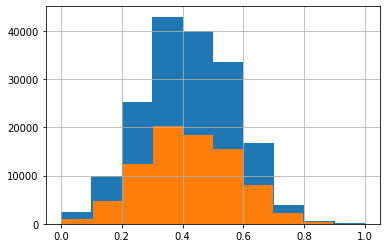

In [ ]:
#it's a normal distribution so just aplly minmaxscaller
from sklearn.preprocessing import MinMaxScaler
MM_scaler=MinMaxScaler()
MM_scaler.fit(train_2[['points']])
train_2['points_scaled']=MM_scaler.transform(train_2[['points']])
test_2['points_scaled']=MM_scaler.transform(test_2[['points']])
train_2['points_scaled'].hist()
test_2['points_scaled'].hist()
plt.show()
train_2['points']=train_2['points_scaled']
test_2['points']=test_2['points_scaled']
train_2.drop(['points_scaled'],axis=1,inplace=True)
test_2.drop(['points_scaled'],axis=1,inplace=True)

In [ ]:
##encoding
train_2['train']=1
test_2['train']=0

In [ ]:
train_test=pd.concat([train_2,test_2],axis=0,ignore_index=True)
del train_2,test_2
gc.collect()

3615

In [ ]:
train_test.drop(['id'],axis=1,inplace=True)

In [ ]:
print("winery unique value ",train_test['winery'].nunique())
print("country unique value ",train_test['country'].nunique())
print("variety unique value ",train_test['variety'].nunique())
print("province unique value ",train_test['province'].nunique())

winery unique value  18158
country unique value  49
variety unique value  745
province unique value  484


In [ ]:
"""train_test.drop(['winery'],axis=1,inplace=True)"""

"train_test.drop(['winery'],axis=1,inplace=True)"

In [ ]:
gc.collect()

0

In [ ]:
counts=train_test['winery'].value_counts()
print(counts)

mask =train_test['winery'].isin(counts[counts<20].index)
train_test['winery'][mask]='Other'

Williams Selyem               582
Testarossa                    491
DFJ Vinhos                    458
Chateau Ste. Michelle         418
Concha y Toro                 376
                             ... 
Château Pavillon Bel-Air        1
William Murdoch                 1
Château la Roseraie             1
Chateau Walla Walla             1
Château de la Font du Loup      1
Name: winery, Length: 18158, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
##onehot encoding 'region_1','region_2','taster_name','taster_twitter_handle'
train_test=pd.get_dummies(train_test,columns=['country'],prefix='C')
train_test=pd.get_dummies(train_test,columns=['variety'],prefix='V')
train_test=pd.get_dummies(train_test,columns=['province'],prefix='P')
train_test=pd.get_dummies(train_test,columns=['winery'],prefix='W')
gc.collect()
train_test=pd.get_dummies(train_test,columns=['region_1'],prefix='r1')
train_test=pd.get_dummies(train_test,columns=['region_2'],prefix='r2')
train_test=pd.get_dummies(train_test,columns=['taster_name'],prefix='tn')
train_test=pd.get_dummies(train_test,columns=['taster_twitter_handle'],prefix='tth')

In [ ]:
cols=[col for col in train_test.columns if col not in ['price','train'] ]
gc.collect()

0

In [ ]:
"""from sklearn.model_selection import GridSearchCV
#mochkla fil overfit
#"langevin":[True] tomorow
#title Tfidf ,fit predict catboost regressor,ensemble,scaler all columns
cbr = CatBoostRegressor()

param_grid = {"random_seed":[45], 
                        "early_stopping_rounds":[50],"verbose":[10], "loss_function":['RMSE'],"iterations":[1000],"task_type":['GPU'],"grow_policy":["Lossguide"],"max_leaves":[64],
              "score_function":['LooL2','SolarL2','SatL2','NewtonL2']}


gbm = GridSearchCV(estimator=cbr, param_grid=param_grid, cv=5,scoring="neg_root_mean_squared_error",verbose=3)

gbm.fit(train_test.loc[train_test['train']==1,cols],train_test.loc[train_test['train']==1,['price']])

print('Best parameters found by grid search are:', gbm.best_params_)
print("Lowest RMSE found: ", np.abs(gbm.best_score_))"""

'from sklearn.model_selection import GridSearchCV\n#mochkla fil overfit\n#"langevin":[True] tomorow\n#title Tfidf ,fit predict catboost regressor,ensemble,scaler all columns\ncbr = CatBoostRegressor()\n\nparam_grid = {"random_seed":[45], \n                        "early_stopping_rounds":[50],"verbose":[10], "loss_function":[\'RMSE\'],"iterations":[1000],"task_type":[\'GPU\'],"grow_policy":["Lossguide"],"max_leaves":[64],\n              "score_function":[\'LooL2\',\'SolarL2\',\'SatL2\',\'NewtonL2\']}\n\n\ngbm = GridSearchCV(estimator=cbr, param_grid=param_grid, cv=5,scoring="neg_root_mean_squared_error",verbose=3)\n\ngbm.fit(train_test.loc[train_test[\'train\']==1,cols],train_test.loc[train_test[\'train\']==1,[\'price\']])\n\nprint(\'Best parameters found by grid search are:\', gbm.best_params_)\nprint("Lowest RMSE found: ", np.abs(gbm.best_score_))'

In [ ]:
gc.collect()

0

In [ ]:

cbr = CatBoostRegressor(random_state=45, 
                        early_stopping_rounds=50,verbose=10, loss_function='RMSE',iterations=10000,task_type='GPU',grow_policy="Lossguide",max_leaves=214,score_function="SolarL2"
                        )

cbr.fit(train_test.loc[train_test['train']==1,cols],train_test.loc[train_test['train']==1,['price']],verbose=3)

Learning rate set to 0.036388
0:	learn: 37.8853980	total: 176ms	remaining: 29m 23s
3:	learn: 36.4731386	total: 608ms	remaining: 25m 19s
6:	learn: 35.2218017	total: 987ms	remaining: 23m 28s
9:	learn: 34.0896588	total: 1.35s	remaining: 22m 27s
12:	learn: 33.1463631	total: 1.72s	remaining: 22m 4s
15:	learn: 32.2681495	total: 2.09s	remaining: 21m 44s
18:	learn: 31.5852861	total: 2.44s	remaining: 21m 21s
21:	learn: 30.9102690	total: 2.81s	remaining: 21m 17s
24:	learn: 30.3639480	total: 3.19s	remaining: 21m 12s
27:	learn: 29.8088225	total: 3.54s	remaining: 21m 1s
30:	learn: 29.3553875	total: 3.92s	remaining: 21m
33:	learn: 28.9491209	total: 4.28s	remaining: 20m 53s
36:	learn: 28.5879800	total: 4.6s	remaining: 20m 38s
39:	learn: 28.2701142	total: 4.95s	remaining: 20m 31s
42:	learn: 27.9507581	total: 5.27s	remaining: 20m 20s
45:	learn: 27.6895630	total: 5.59s	remaining: 20m 8s
48:	learn: 27.4210855	total: 5.9s	remaining: 19m 58s
51:	learn: 27.1944906	total: 6.19s	remaining: 19m 43s
54:	learn: 

In [ ]:
y_cbr=cbr.predict(train_test.loc[train_test['train']==0,cols])
y_cbr

array([104.83044729,  44.46620634,  33.64374212, ...,  31.36009496,
        25.12633765,  53.4640611 ])

In [ ]:
"""np.clip(y_cbr, a_min = 0, a_max = 400) """

In [ ]:
gc.collect()

0

In [ ]:
sub['price']=abs(y_cbr)
sub.to_csv('best2wineryotherabs20regionwtasteronehotfeaturebasicscalerSolarL2.csv',index=False)

In [ ]:
gc.collect()

14

In [ ]:
"""sub['price'].hist()"""

In [ ]:
#ensembling

In [ ]:
from tensorflow.keras.models import Model
import tensorflow.keras.layers as L
def create_mpl(shape):
    '''
    Returns a keras model
    '''
    
    X_input = L.Input(shape)
    
    X = L.Dense(5000, activation='relu')(X_input)
    X = L.Dense(5000, activation='relu')(X)
    X = L.Dense(2500, activation='relu')(X)
    X = L.Dense(1750, activation='relu')(X)
    X = L.Dense(850, activation='relu')(X)
    X = L.Dense(425, activation='relu')(X)
    X = L.Dense(225, activation='relu')(X)
    X = L.Dense(112, activation='relu')(X)
    X = L.Dense(64, activation='relu')(X)
    X = L.Dense(22, activation='relu')(X)
    X = L.Dense(11, activation='relu')(X)
    X = L.Dense(1, activation='relu')(X)
    
    model = Model(inputs=X_input, outputs=X)
    
    return model


mlp = create_mpl(train_test.loc[train_test['train']==1,cols].values[0].shape)
mlp.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
print(mlp.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8068)]            0         
_________________________________________________________________
dense (Dense)                (None, 5000)              40345000  
_________________________________________________________________
dense_1 (Dense)              (None, 5000)              25005000  
_________________________________________________________________
dense_2 (Dense)              (None, 2500)              12502500  
_________________________________________________________________
dense_3 (Dense)              (None, 1750)              4376750   
_________________________________________________________________
dense_4 (Dense)              (None, 850)               1488350   
_________________________________________________________________
dense_5 (Dense)              (None, 425)               361675

In [ ]:
gc.collect()

22

In [ ]:
###scaler on basic feature on tree based model had imporoved alittle bit my score

In [ ]:
mlp.fit(x=train_test.loc[train_test['train']==1,cols].values, y=train_test.loc[train_test['train']==1,['price']].values, epochs=10, batch_size=1024)

Epoch 1/10
171/171 [==============================] - 34s 201ms/step - loss: 972.0936 - mse: 972.4111
Epoch 2/10
171/171 [==============================] - 34s 200ms/step - loss: 476.4879 - mse: 476.5868
Epoch 3/10
171/171 [==============================] - 34s 200ms/step - loss: 364.8126 - mse: 364.8799
Epoch 4/10
171/171 [==============================] - 34s 200ms/step - loss: 236.4533 - mse: 236.5282
Epoch 5/10
171/171 [==============================] - 34s 200ms/step - loss: 222.5892 - mse: 222.6536
Epoch 6/10
171/171 [==============================] - 34s 200ms/step - loss: 168.1821 - mse: 168.1785
Epoch 7/10
171/171 [==============================] - 34s 200ms/step - loss: 103.5205 - mse: 103.5107
Epoch 8/10
171/171 [==============================] - 34s 200ms/step - loss: 78.3481 - mse: 78.3455
Epoch 9/10
171/171 [==============================] - 34s 200ms/step - loss: 66.9091 - mse: 66.9126
Epoch 10/10
171/171 [==============================] - 34s 200ms/step - loss: 63.0984 

In [ ]:
mlp_pred=mlp.predict(train_test.loc[train_test['train']==0,cols].values)
mlp_pred

array([[123.01206 ],
       [ 35.14028 ],
       [ 37.95853 ],
       ...,
       [ 34.592358],
       [ 22.939468],
       [ 65.31473 ]], dtype=float32)

In [ ]:
gc.collect()

1388

In [ ]:
sub['price']=abs(mlp_pred)
sub.to_csv('mlp1015otherregiotasteronehotbasicfeaturescaler.csv',index=False)

In [ ]:
"""sub['price']=(abs(mlp_pred)+abs(y_cbr))/2
sub.to_csv('best2wineryotherabsmlpcatboost.csv',index=False)"""